# check baseline tokenizer
baseline 모델인 klue/bert-base의 tokenizer로 train data를 tokenizing했을 때의 길이 분포를 확인하고자 함
이를 통해 max_length를 적절하게 조절할 수 있음

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from transformers import AutoTokenizer

In [2]:
train_data = pd.read_csv("../../data/train.csv")

In [3]:
train_data.head()

,ID,text,target,url,date
0,ynat-v1_train_00000,개포2단지 분양 앞두고 개포지구 재건축 불붙어,1,https://news.naver.com/main/read.nhn?mode=LS2D...,2016.03.16. 오전 11:37
1,ynat-v1_train_00001,삼성전자 KBIS 2018서 셰프컬렉션 선보여,0,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.01.10. 오전 8:33
2,ynat-v1_train_00002,LG G6 사면 BO 이어폰이 단돈 5천원,0,https://news.naver.com/main/read.nhn?mode=LS2D...,2017.04.30. 오전 10:00
3,ynat-v1_train_00003,신간 블록체인혁명 2030·남자의 고독사,3,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.06.13. 오전 11:49
4,ynat-v1_train_00004,이스라엘 정보당국 팔레스타인인 50명 테러 혐의로 체포,4,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.12.18. 오후 11:15


In [10]:
tokenizer = AutoTokenizer.from_pretrained("klue/bert-base")

In [32]:
tokenized_data = []
for item in train_data["text"]:
    output = tokenizer(item, add_special_tokens=True)
    tokenized_data.append(len(output["input_ids"]))

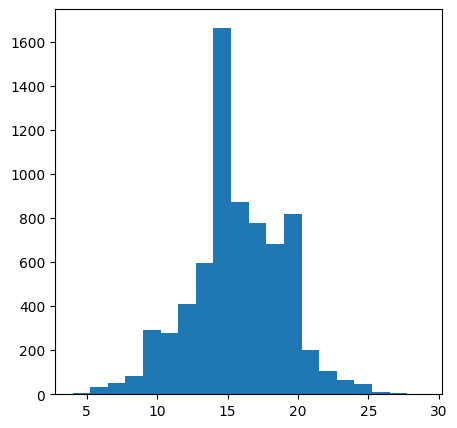

In [33]:
plt.figure(figsize=(5,5))
plt.hist(tokenized_data, bins=20)
plt.show()

In [34]:
# padding="max_length"로 지정하지 않은 경우에는 max : 29
print("tokenized max : ", max(tokenized_data))

tokenized max :  29


In [35]:
# padding="max_length"로 지정한 경우 --> baseline에서 사용한 방법
text_list = list(train_data["text"])
output2 = tokenizer(text_list, padding='max_length', truncation=True, return_tensors='pt', add_special_tokens=True)
tokenized_data2 = [len(x) for x in output2["input_ids"]]

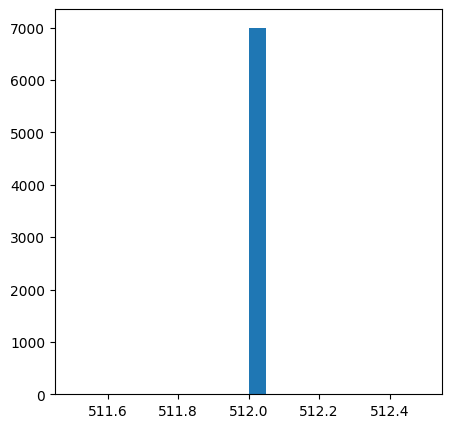

In [36]:
plt.figure(figsize=(5,5))
plt.hist(tokenized_data2, bins=20)
plt.show()

In [37]:
# padding="max_length"로 지정한 경우의 max : 512
print("tokenized max : ", max(tokenized_data2))

tokenized max :  512


# 결론
baseline에서 사용하는 padding="max_length"는 모델이 입력받을 수 있는 최대 크기인 512로 길이가 맞춰진다.
그래서 padding 토큰이 각 입력마다 많이 들어가게 되고, 이는 너무 비효율적이다.
klue/bert-base의 tokenizer로 train data를 tokenizing한 데이터의 max는 29이므로, 
max_length=32, padding=True로 설정해서 사용하자